# Fitting Models Exercise 2

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

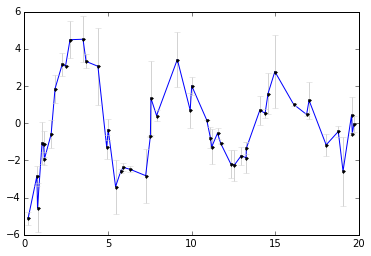

In [17]:
# YOUR CODE HERE
t = np.load("decay_osc.npz")
tdata = t['tdata']
ydata = t['ydata']
dy = t['dy']
plt.plot(tdata, ydata)
plt.errorbar(tdata, ydata, dy, fmt='.k', ecolor='lightgray');

In [ ]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

a: -4.89598759534 +/- 0.0632082155982
g: 0.09366414726 +/- 0.00287615357753
w: -1.00111421585 +/- 0.000813940556602
d: 0.0266129863316 +/- 0.0142319310191


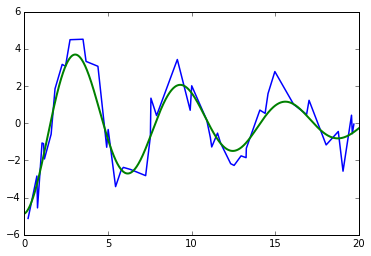

In [38]:
# YOUR CODE HERE
def model(t, a, g, w, d):
    return a*np.exp(-g*t)*np.cos(w*t)+d;

vals, cov = opt.curve_fit(model, tdata, ydata, sigma=dy, absolute_sigma=True)
for i in range(0, 4):
    print(['a: ', 'g: ', 'w: ', 'd: '][i] + str(vals[i]) + " +/- " + str(np.sqrt(cov[i][i])))
    
yfit = model(np.linspace(0, 20, 1000), vals[0], vals[1], vals[2], vals[3])

plt.plot(tdata, ydata, linewidth=1.5)
plt.plot(np.linspace(0, 20, 1000), yfit, label="best fit", linewidth=2);
np.title("Best fit of model by data")
np.xlabel("t")
np

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors